Решить квазилинейное уравнение переноса
\begin{equation} \label{c8eq1}
	\begin{cases}
		\displaystyle \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0 \\
		\displaystyle u(x,0) = \frac{1}{1 + \left( \displaystyle \frac{x-50}{10} \right)^4} \\
		u(0,t) = u(0,0) 
	\end{cases}.
\end{equation}

Задачу следует решать на отрезке $[0; 100]$ по пространству. Шаг равномерной сетки по пространству $h = 1$, шаг по времени $\tau = 0.05$. Число шагов по времени $N = 1000$.

Расчет вести с помощью консервативной чисто неявной схемы для квазилинейного уравнения переноса
\begin{equation} \label{c8eq2}
	\frac{\hat{u}_n - u_n}{\tau} + \frac{\hat{u}^2_n - \hat{u}^2_{n-1}}{2h} = 0.	
\end{equation}

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from time import sleep
import matplotlib.animation as animation

In [43]:
h = 1
tau = 0.05
H = round(100/h + 1)
T = round(50/tau + 1)

x = [h*xx for xx in range(H)]
t = [tau*tt for tt in range(T)]

phi = lambda x: 1/(1 + (x/10 - 5)**4)
mu = lambda t: phi(0)

def solver(phi, mu, x, t):
  
    N = len(x)
    P = len(t)
    
    u = np.zeros((P, N))
    plt.figure(figsize = (18, 9))
    u[:,0] = [mu(tt) for tt in t]
    u[0,:] = [phi(xx) for xx in x]
    
    plt.plot(x, u[0,:], 'r--', label = r'$U_0$')  
    
    for i in range(1, len(t)):
        for j in range(1, len(x)):
            u[i][j] = (-2*h + np.sqrt(4*h**2+4*tau*(2*h*u[i-1][j]+tau*u[i-1][j-1]*u[i-1][j-1])))/(2*tau)
    
    plt.plot(x, u[10,:], 'b', label = 'Iteration ' + str(1))
        
    plt.xlabel('x', fontsize = 20)
    plt.ylabel('u(x)', fontsize = 20)
    plt.grid()    
    plt.legend(loc = 'best', fontsize = 16)
    
    plt.show()
    
    return u

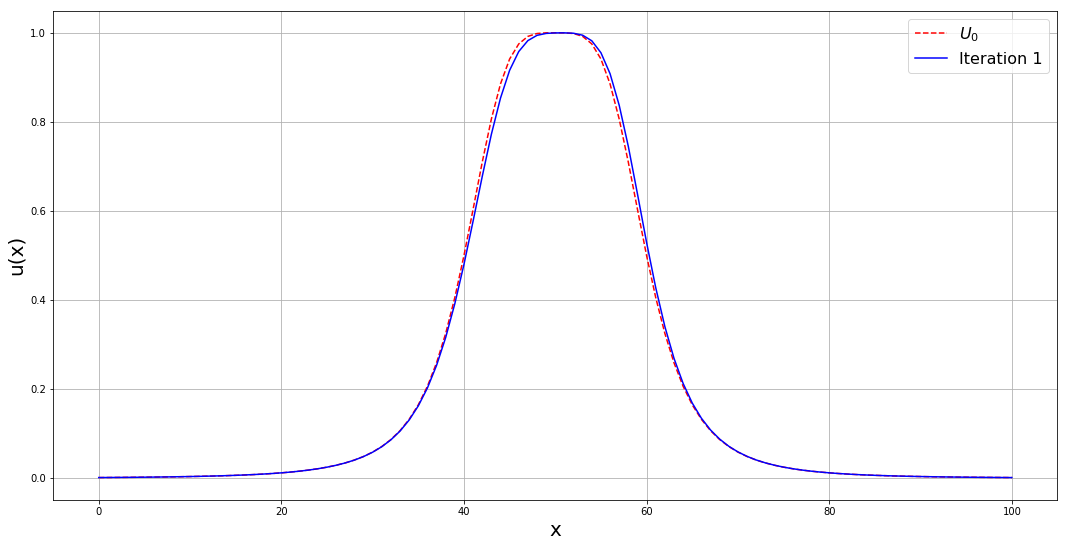

In [44]:
%matplotlib inline
u = solver(phi, mu, x, t)

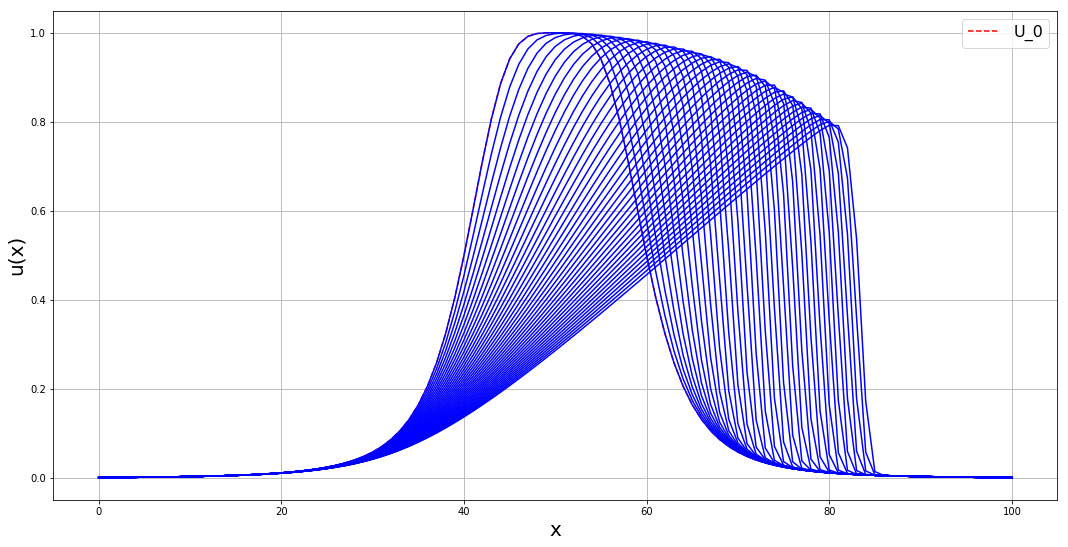

In [49]:
%matplotlib inline
U_all = u
plt.figure(figsize = (18, 9))
plt.plot(x, U_all[0,:], 'r--', label = 'U_0') 

m = 24

for i in range(int(len(u)/m)):
    plt.plot(x, U_all[m*i,:], 'b')

plt.xlabel('x', fontsize = 20)
plt.ylabel('u(x)', fontsize = 20)
plt.grid()    
plt.legend(loc = 'best', fontsize = 16)

plt.show()    

In [ ]:
%matplotlib notebook

fig = plt.figure(figsize=(13,7))
m = 4
n = len(U_all)

def animate(i):
    
    plt.clf()
    plt.plot(x, U_all[i*m,:], 'b')
    plt.xlim(0, 100)
    plt.ylim(-0.1, 1.1)
    
    plt.grid(ls='solid')
    #plt.title(r'$\frac{\delta}$', fontsize = 15)
    plt.xlabel('x', fontsize = 15)
    plt.ylabel('U(x)', fontsize = 15)
        
anim = animation.FuncAnimation(fig, animate, frames=int(n/m), interval=1, repeat=True)